In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:\\Users\\burvashi\\Desktop\\student analysis\\Expanded_data_with_more_features.csv")

print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [7]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [9]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop unnamed Column

In [10]:
df = df.drop("Unnamed: 0", axis = 1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Gender distribution

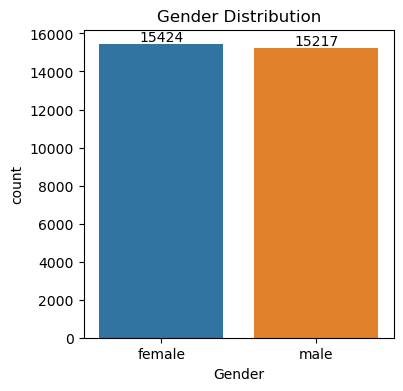

In [11]:
plt.figure(figsize = (4,4))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [12]:
#from the above chart we have an analysis that the number of females is more than that of males in the data

In [13]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


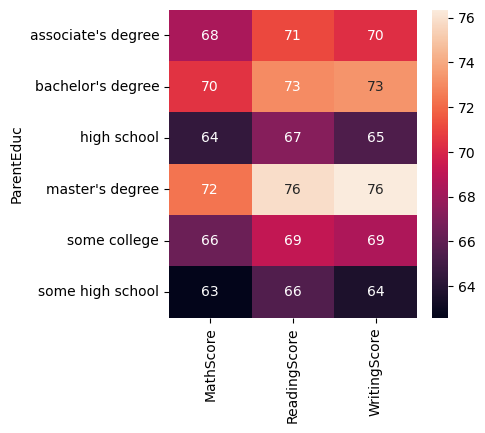

In [14]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True)
plt.show()

In [15]:
#from the above chart we conclude that the parents education have good impact on your scores

In [16]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":'mean', "WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


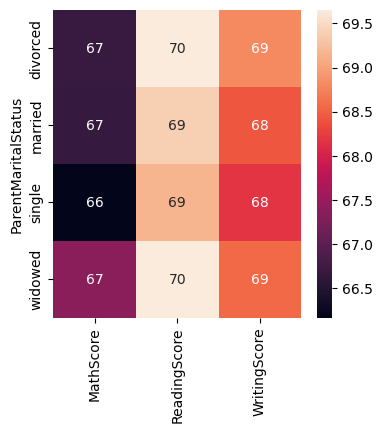

In [17]:
plt.figure(figsize = (4,4))
sns.heatmap(gb1, annot = True)
plt.show()

In [18]:
#from the above chart we can coclude that there is negligible/No imapct on students scores due to their parent's marital status.

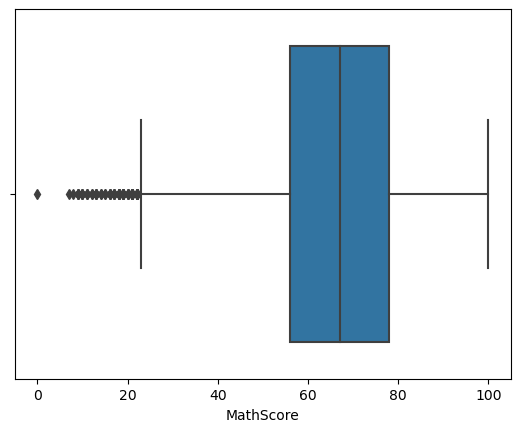

In [19]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

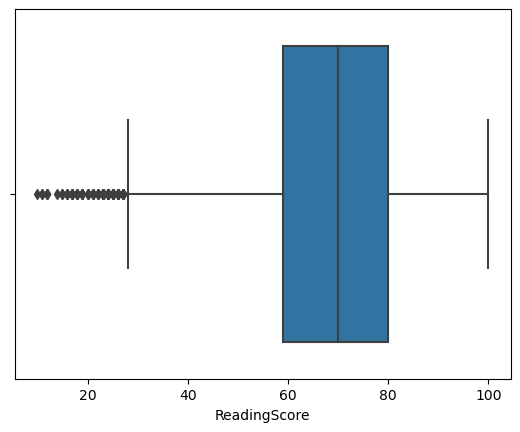

In [20]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

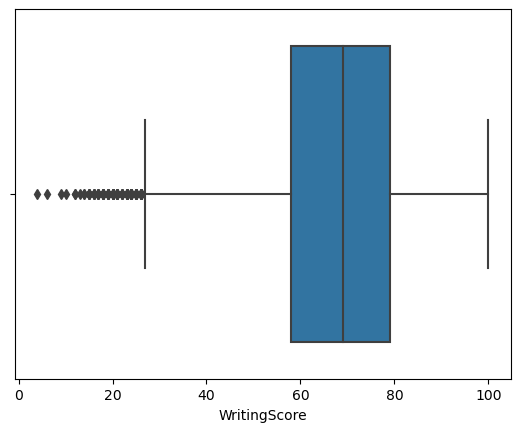

In [21]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [22]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution Of Ethinic Groups

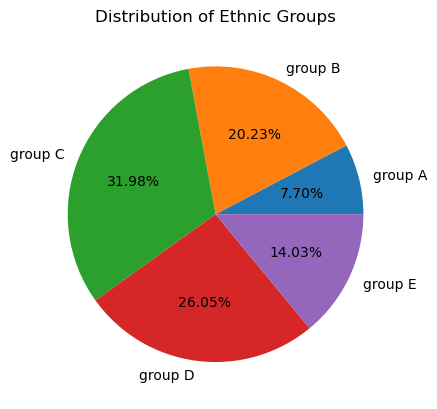

In [23]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

labels = ["group A", "group B", "group C", "group D", "group E"]
sizes = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Distribution of Ethnic Groups")
plt.show()


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

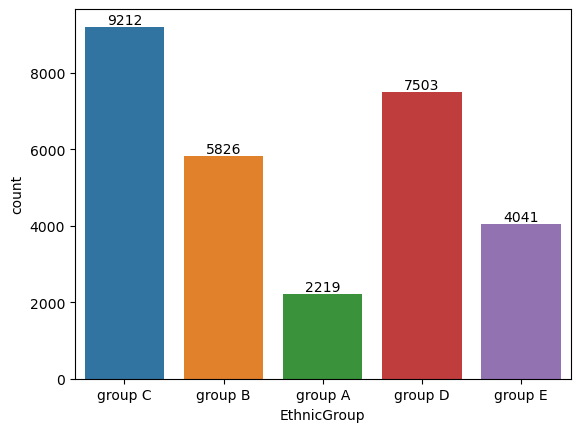

In [24]:
ax=sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])

# Grouped Analysis

In [25]:
# List of categorical variables
cat_vars = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

# Analyze scores based on categorical variables
for var in cat_vars:
    print(f"Grouped by {var}:")
    print(df.groupby(var)[['MathScore', 'ReadingScore', 'WritingScore']].mean())
    print("\n")

Grouped by Gender:
        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


Grouped by EthnicGroup:
             MathScore  ReadingScore  WritingScore
EthnicGroup                                       
group A      62.991888     66.787742     65.251915
group B      63.490216     67.320460     65.895125
group C      64.695723     68.438233     66.999240
group D      67.666400     70.382247     70.890844
group E      75.298936     74.251423     72.677060


Grouped by ParentEduc:
                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.1797

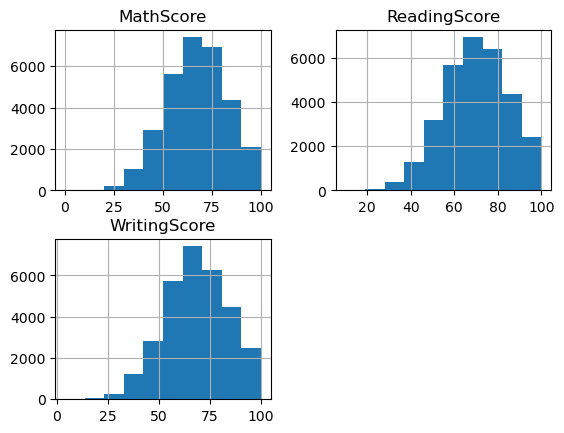

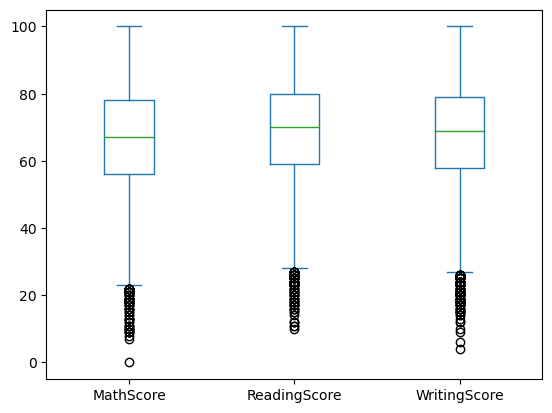

In [26]:
# Plot histograms
df[['MathScore', 'ReadingScore', 'WritingScore']].hist(bins=10)
plt.show()

# Plot boxplots
df[['MathScore', 'ReadingScore', 'WritingScore']].plot(kind='box')
plt.show()

In [27]:
gb3 = df.groupby("PracticeSport").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb3)

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


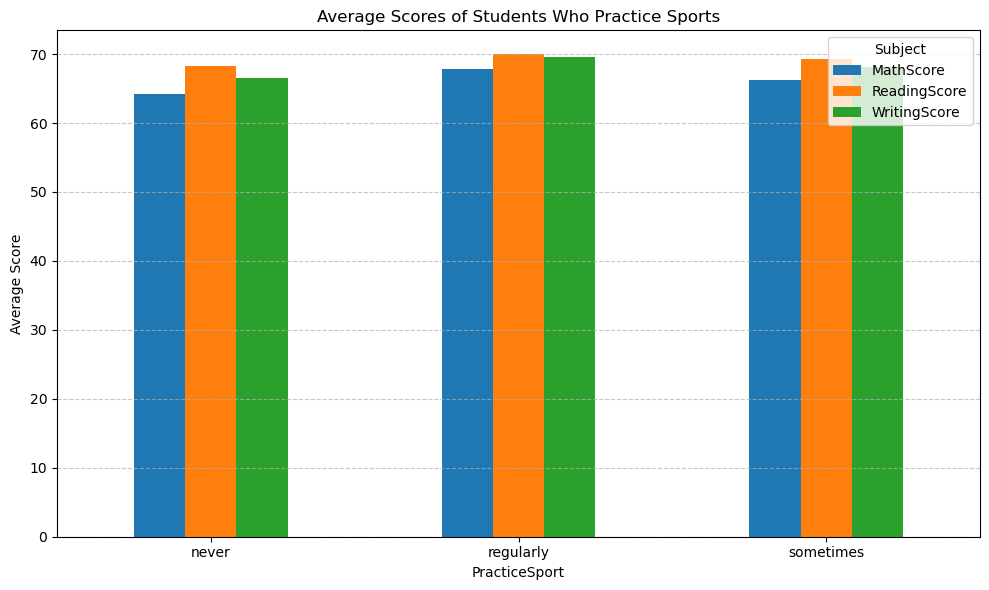

In [28]:
gb3.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores of Students Who Practice Sports')
plt.xlabel('PracticeSport')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# From the above charts we can conclude that the students who practice sports regularly have good score overall compared to the students who never practice sports regularly.

In [29]:
print(df["LunchType"].unique())

['standard' 'free/reduced']


In [30]:
# Cross-tabulate LunchType and ParentMaritalStatus
cross_tab = pd.crosstab(df['LunchType'], df['ParentMaritalStatus'])
print(cross_tab)

ParentMaritalStatus  divorced  married  single  widowed
LunchType                                              
free/reduced             1705     5876    2547      219
standard                 3214    10968    4550      372


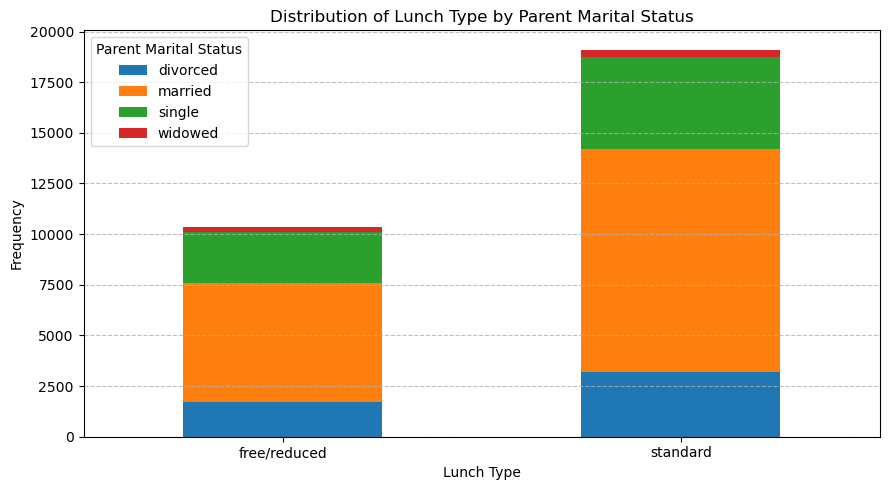

In [31]:
# Plotting
cross_tab.plot(kind='bar', stacked=True, figsize=(9, 5))
plt.title('Distribution of Lunch Type by Parent Marital Status')
plt.xlabel('Lunch Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Parent Marital Status')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

# From the above chart we can see the Distribuation of Lunch Type by Parents Marital Status.

In [32]:
gb4 = df.groupby("LunchType").agg({"MathScore" : "mean", "ReadingScore" : "mean", "WritingScore" : "mean"})
print(gb4)


              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


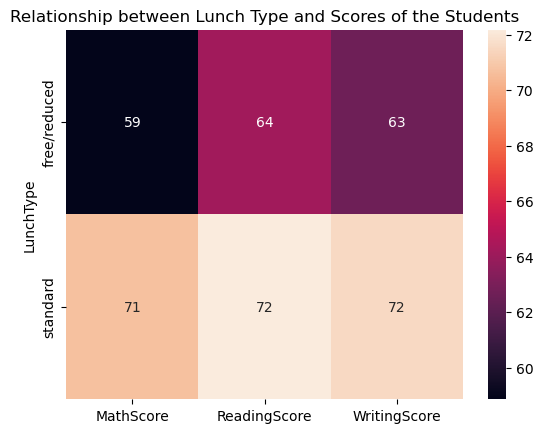

In [33]:
sns.heatmap(gb4, annot = True)
plt.title("Relationship between Lunch Type and Scores of the Students")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
# Handle missing values and convert categorical variables to dummy variables
df = df.dropna()
df = pd.get_dummies(df)

# Separate the features (X) and the target variable (y)
X = df.drop('MathScore', axis=1)
y = df['MathScore']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 28.544475796120434


# Classification Analysis

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
df = pd.read_csv('Expanded_data_with_more_features.csv')

# Convert scores into grades
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']
df['Grade'] = pd.cut(df['MathScore'], bins=bins, labels=labels)

# Convert categorical variables to numeric
le = LabelEncoder()
df['ParentMaritalStatus'] = le.fit_transform(df['ParentMaritalStatus'])
df['Grade'] = le.fit_transform(df['Grade'])

# Separate the features (X) and the target variable (y)
X = df[['ParentMaritalStatus']]
y = df['Grade']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a classification model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.3387175721977484
